K-moyennes

https://fr.wikipedia.org/wiki/K-moyennes

K-means Clustering from Scratch in Python

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

Le partitionnement en k-moyennes (ou k-means en anglais) est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster ; la fonction à minimiser est la somme des carrés de ces distances.

Les algorithmes d'apprentissage automatique peuvent être classés en apprentissage supervisé et non supervisé. Dans l'apprentissage supervisé, il y aura l'ensemble de données avec les caractéristiques d'entrée et la variable cible. Le but de l'algorithme est d'apprendre l'ensemble de données, d'y trouver les modèles cachés et de prédire la variable cible. La variable cible peut être continue comme dans le cas de la régression ou discrète comme dans le cas de la classification. Des exemples de problèmes de régression comprennent la prévision des prix des logements, la prévision du marché boursier, l'humidité de l'air et la prévision de la température. Des exemples de problèmes de classification incluent la prédiction du cancer (bénin ou malin), la classification des spams par e-mail, etc. Notre article montre la prochaine catégorie d'apprentissage automatique qui est l'apprentissage non supervisé.

Alors maintenant, l'un des autres domaines de l'apprentissage automatique est l'apprentissage non supervisé, où nous aurons les données, mais nous n'avons pas de variable cible comme dans le cas de l'apprentissage supervisé. Le but ici est donc d'observer les modèles cachés parmi les données et de les regrouper en grappes, c'est-à-dire que les points de données qui ont des propriétés partagées tomberont dans une grappe ou un groupe similaire. Alors, où le clustering est-il utilisé? Avez-vous déjà observé les actualités google où chaque catégorie comme le sport, la politique, le cinéma, la science a des milliers d'articles d'actualité? C'est le clustering. L'algorithme regroupe les articles de presse qui ont des caractéristiques communes en eux dans des groupes séparés pour former un cluster. D'autres exemples de clustering incluent l'analyse des réseaux sociaux, la segmentation du marché, les systèmes de recommandation, etc.

Un des algorithmes de clustering de base est l'algorithme de clustering K-means que nous allons discuter et implémenter à partir de zéro dans cet article. Examinons le but final du regroupement à partir des deux exemples d'images et d'un exemple pratique. La première image est le tracé de l'ensemble de données avec les caractéristiques x1 et x2. Vous pouvez voir que les données ne sont pas regroupées, nous ne pouvons donc rien conclure simplement en examinant l'intrigue. La deuxième image est obtenue après avoir effectué le clustering, nous pouvons observer que les points de données qui sont proches les uns des autres sont regroupés en cluster. Dans des situations pratiques, cela peut être traité comme un cas où nous traitons des données clients et nous sommes invités à segmenter le marché en fonction des revenus des clients et du nombre de transactions précédentes. Supposons ici que la fonctionnalité x1 est le revenu annuel et la fonctionnalité x2 est le nombre de transactions, sur la base de ces fonctionnalités, nous pouvons regrouper les données et les segmenter en trois catégories comme les clients à faible revenu annuel mais un nombre élevé de transactions (comme le cluster orange), clients à revenu moyen et nombre moyen de transactions (comme le cluster vert), clients à revenu élevé mais faible nombre de transactions (comme le cluster bleu). Sur la base de ces segments, l'équipe marketing de l'entreprise peut redéfinir ses stratégies marketing pour obtenir plus de transactions en recommandant les produits que chaque client du cluster pourrait acheter.

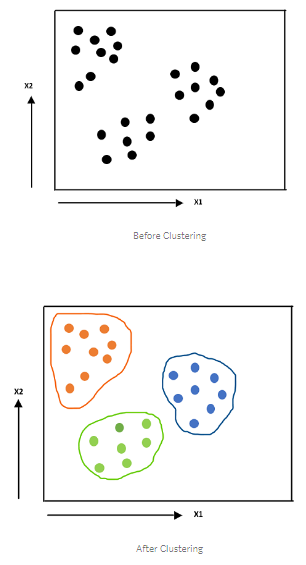

Intuition de regroupement K-Means:

Jusqu'à présent, nous avons discuté de l'objectif du clustering et d'une application pratique, il est maintenant temps de plonger dans l'implémentation et l'algorithme du clustering K-means. Comme son nom l'indique, cet algorithme regroupera n points de données en K nombres de grappes. Donc, étant donné une grande quantité de données, nous devons regrouper ces données en K grappes.

Mais le problème est de savoir comment choisir le nombre de clusters? La plupart du temps, nous saurons quel type de clusters nous devons utiliser, par exemple dans le cas des actualités Google, nous savions déjà que disaient 4 types de clusters (sports, politique, science, cinéma) et que les articles d'actualité devaient être regroupés dans l'un d'eux. Mais dans le cas d'un problème de segmentation du marché, comme l'objectif est de regrouper le type de clients, nous ne savons pas combien de types de clients sont présents dans l'ensemble de données (comme les riches, les pauvres, qui aiment faire du shopping, qui n'aiment pas shopping, etc.) c'est-à-dire que nous ne savons pas exactement combien de clusters doivent être choisis et que nous ne pouvons pas supposer au hasard le nombre de clusters en fonction de certaines règles de base (comme les personnes ayant un revenu annuel supérieur à «x», le nombre devrait être un). cluster et inférieur à «x» devrait tomber dans un autre).

Nous discuterons de la solution à ce problème, plus loin dans l'article, mais supposons maintenant que nous allons segmenter nos données en 3 clusters. Certains des termes mathématiques impliqués dans le regroupement des moyennes K sont les centroïdes, la distance euclidienne. Sur une note rapide, le centre de gravité d'une donnée est la moyenne ou la moyenne des données et la distance euclidienne est la distance entre deux points dans le plan de coordonnées. Étant donné deux points A (x1, y1) et B (x2, y2), la distance euclidienne entre ces deux points est:

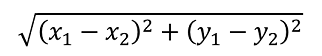

Lors de la mise en œuvre, nous ne considérerons pas la racine carrée car nous pouvons comparer le carré des distances et arriver à des conclusions.

Algorithme:

Commençons maintenant par parler des étapes de mise en œuvre. Nous utiliserons soit des centres de cluster, soit des mots centroïdes pour décrire les centres de cluster.

Étape 1:

Initialiser au hasard les centres de cluster de chaque cluster à partir des points de données. En fait, l'initialisation aléatoire n'est pas un moyen efficace de commencer, car elle conduit parfois à un nombre accru d'itérations de clustering requises pour atteindre la convergence, à un temps d'exécution global plus long et à un algorithme global moins efficace. Il existe donc de nombreuses techniques pour résoudre ce problème, comme K-means ++, etc. Discutons également de l'une des approches pour résoudre le problème de l'initialisation aléatoire plus loin dans l'article. Supposons donc K = 3, donc nous choisissons au hasard 3 points de données et les supposons comme centroïdes.

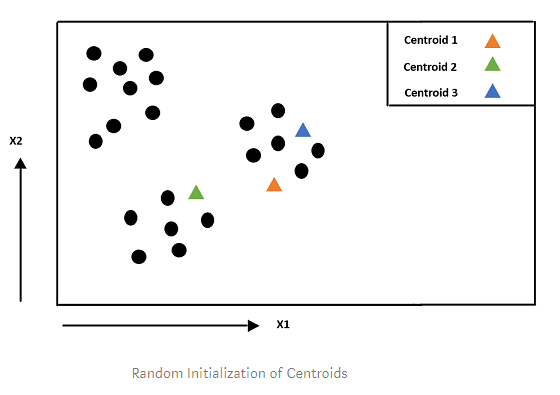

Ici, trois centres de grappe ou centroïdes avec les marqueurs triangulaires vert, orange et bleu sont choisis au hasard. Encore une fois, ce n'est pas une méthode efficace pour choisir les centres de grappe initiaux.

Étape 2:

2a. Pour chaque point de données, calculez la distance euclidienne de tous les centroïdes (3 dans ce cas) et affectez le cluster en fonction de la distance minimale à tous les centroïdes. Dans notre exemple, nous devons prendre chaque point noir, calculer sa distance euclidienne de tous les centroïdes (vert, orange et bleu), et enfin colorier le point noir à la couleur du centroïde le plus proche.

2b. Ajustez le centroïde de chaque cluster en prenant la moyenne de tous les points de données qui appartiennent à ce cluster sur la base des calculs effectués à l'étape 2a. Dans notre exemple, comme nous avons attribué tous les points de données à l'un des clusters, nous devons calculer la moyenne de tous les clusters individuels et déplacer le centre de gravité vers la moyenne calculée.

Répétez ce processus jusqu'à ce que les grappes soient bien séparées ou que la convergence soit atteinte.

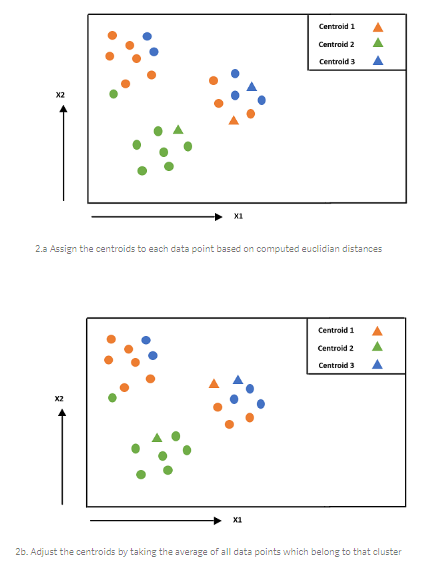

Répétez ces étapes jusqu'à ce que la convergence soit atteinte:

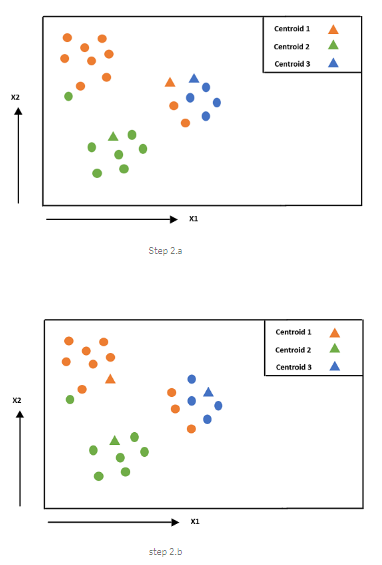

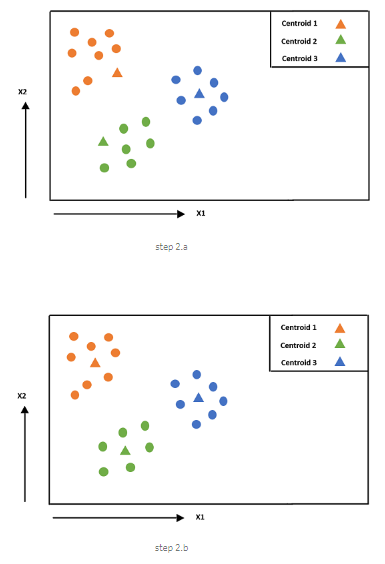

Mise en œuvre à partir de zéro:

Maintenant que nous connaissons l'intuition, implémentons l'algorithme en python à partir de zéro. Nous avons besoin de bibliothèques numpy, pandas et matplotlib pour améliorer la complexité de calcul et la visualisation des résultats. Le jeu de données que nous allons utiliser est ‘Mall_Customers.csv’ et le lien vers le jeu de données se trouve dans la page GitHub. (Remarque: l'ensemble de données a été téléchargé depuis le site Web de SuperDataScience).

Lisons l'ensemble de données et obtenons les exemples de données

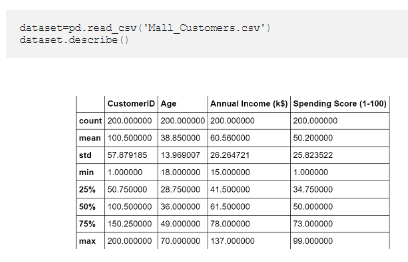

Pour la commodité de la visualisation, nous allons prendre comme résultat le revenu annuel et les dépenses.

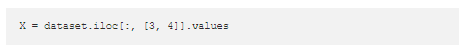

Maintenant, X est deux matrices de forme (200,2).

L'étape suivante consiste à choisir le nombre d'itérations qui pourraient garantir la convergence. Nous devons essayer de nombreuses possibilités pour trouver le nombre optimal d'itérations nécessaires à la convergence. Il n'est pas nécessaire de choisir un très grand nombre, car à la 100e itération, par exemple, si les centroïdes sont arrivés à leur emplacement réel ou à leur meilleur emplacement possible, même après avoir effectué 1000 itérations supplémentaires, l'algorithme donnera les mêmes résultats. Pour plus de commodité, commençons par choisir le nombre d'itérations à 100.

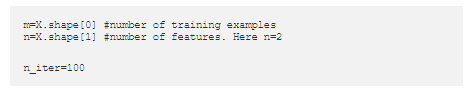

L'étape suivante consiste à choisir le nombre de clusters K. Prenons 5 comme K et comme cela a été mentionné plus tôt, nous allons voir une méthode plus loin dans l'article, qui nous trouvera le nombre optimal de clusters K.

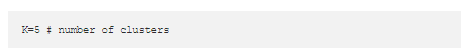

Nous sommes prêts à mettre en œuvre nos étapes de regroupement K Means. Continuons:

Étape 1: initialisez les centroïdes au hasard à partir des points de données:

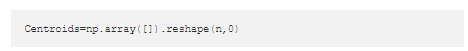

Les centres de gravité sont une matrice dimensionnelle K, où chaque colonne sera un centre de gravité pour un cluster.

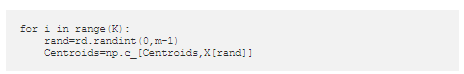

Étape 2.a: pour chaque exemple d'entraînement, calculez la distance euclidienne par rapport au centroïde et affectez le cluster en fonction de la distance minimale.

La sortie de notre algorithme doit être un dictionnaire avec le numéro de cluster comme clés et les points de données qui appartiennent à ce cluster comme valeurs. Alors initialisons le dictionnaire.

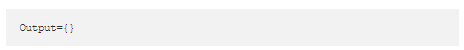

Nous trouvons la distance euclidienne de chaque point à tous les centroïdes et stockons dans une matrice m X K. Ainsi, chaque ligne de la matrice EuclidianDistance aura des distances de ce point de données particulier de tous les centroïdes. Ensuite, nous allons trouver la distance minimale et stocker l'indice de la colonne dans un vecteur C.

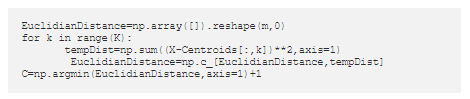

Étape 2.b: Nous devons regrouper les points de données en fonction de l'index de cluster C et les stocker dans le dictionnaire de sortie et également calculer la moyenne des clusters séparés et l'affecter en tant que nouveaux centroïdes. Y est un dictionnaire temporaire qui stocke la solution pour une itération particulière.

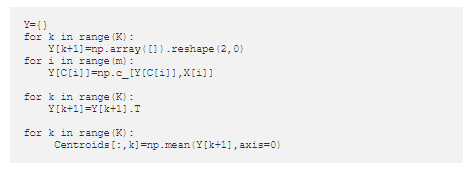 

Nous devons maintenant répéter l'étape 2 jusqu'à ce que la convergence soit atteinte. En d'autres termes, nous bouclons sur n_iter et répétons les étapes 2.a et 2.b comme indiqué:

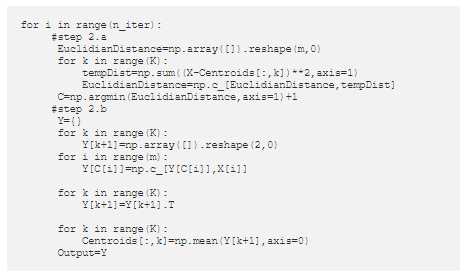

Il est maintenant temps de visualiser l'algorithme et de remarquer comment les données d'origine sont regroupées. Pour commencer, dispersons d'abord les données non clusterisées d'origine.

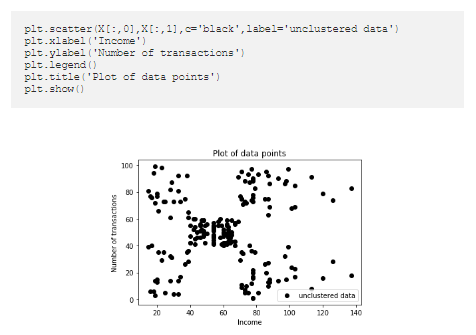

Maintenant, tracons les données en cluster:

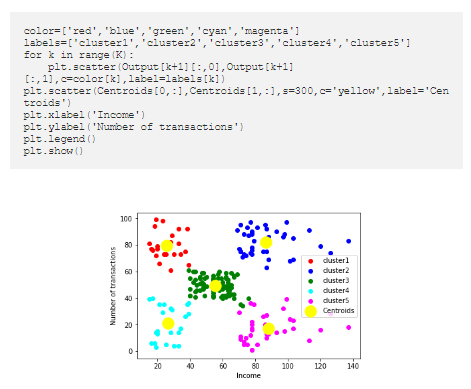

Wow, c'est tellement beau et instructif aussi! Nos données sont devenues des données en cluster à partir de données brutes non clusterisées. On peut observer qu'il existe cinq catégories de clusters qui sont:

1-Clients à faible revenu mais avec un nombre élevé de transactions (pour ces types, la société peut recommander des produits à bas prix) - Red cluster
2-Clients à faible revenu et à faible nombre de transactions (Peut-être que ce type de clients est trop occupé à économiser leur argent) - Cyan Cluster
3-Clients à revenu moyen et nombre moyen de transactions - Green Cluster
4-Clients avec un revenu élevé et un faible nombre de transactions - Magenta Cluster
5-Clients avec un revenu élevé et un nombre élevé de transactions - Blue cluster.

Ainsi, l'entreprise peut diviser ses clients en 5 classes et concevoir différentes stratégies pour un type de clients différent afin d'augmenter leurs ventes. Jusqu'ici tout va bien, mais comment arriver à la conclusion qu'il devrait y avoir 5 clusters? Pour découvrir comment, visualisons les données en cluster avec différents clusters de 1 à 10.

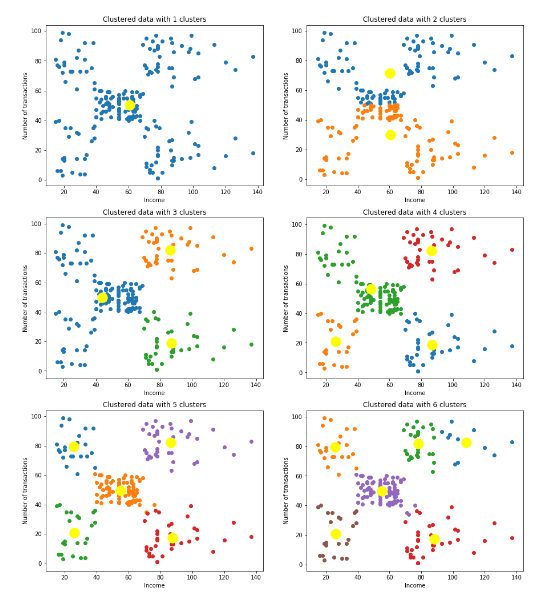

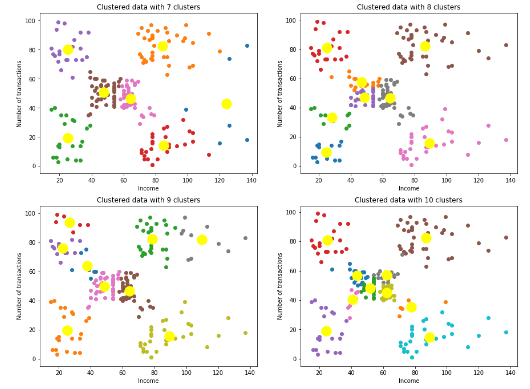 

Maintenant, nous voyons beaucoup de graphiques montrant les données en cluster avec un nombre différent de clusters. La question est donc quelle est la meilleure valeur pour K? Supposons que nous ayons n points de données et que nous choisissions n groupes, c'est-à-dire que chaque point de données est un groupe, est-ce un bon modèle? Non, évidemment pas et l'inverse n'est pas non plus un bon modèle, c'est-à-dire un cluster pour n points de données. Alors, comment pouvons-nous trouver le K approprié? La réponse réside dans le fait que pour chaque point de données, son centre de cluster doit être le plus proche ou en d'autres termes, "la somme des carrés de distances de chaque point de données à partir de son centre de gravité de cluster correspondant doit être aussi minimale que possible". Cette affirmation sera à nouveau en contradiction avec le fait que si tous les points de données sont traités comme des grappes individuelles, alors la somme des carrés des distances sera 0. Donc, pour contrer ce fait, nous utilisons une méthode appelée méthode ELBOW pour trouver le nombre approprié de grappes . Le paramètre qui sera pris en considération est la somme des carrés des distances de chaque point de données à partir de son centre de gravité de cluster correspondant qui est appelé WCSS (Sommes de carrés intra-cluster).

Les étapes impliquées dans la méthode ELBOW sont:

1-Perform K signifie un regroupement sur différentes valeurs de K allant de 1 à toute limite supérieure. Ici, nous prenons la limite supérieure à 10.
2-Pour chaque K, calculer WCSS
3-Tracer la valeur de WCSS avec le nombre de grappes K.
4-L'emplacement d'un pli (genou) dans le graphique est généralement considéré comme un indicateur du nombre approprié de grappes. c'est-à-dire que le point après lequel le WCSS ne diminue pas plus rapidement est la valeur appropriée de K.

Alors implémentons cela et voyons comment K = 5 est le meilleur.

Remarque: J'ai converti l'algorithme d'une manière orientée objet. Kmeans est le nom de la classe, la méthode fit effectuera le clustering Kmeans, et predit renverra le dictionnaire de sortie et la matrice Centroid. Le code réel peut être trouvé sur le lien Github.

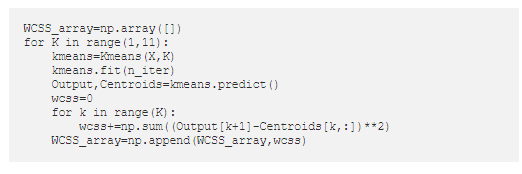

Tracons maintenant le tableau WCSS avec des clusters de 1 à 10.

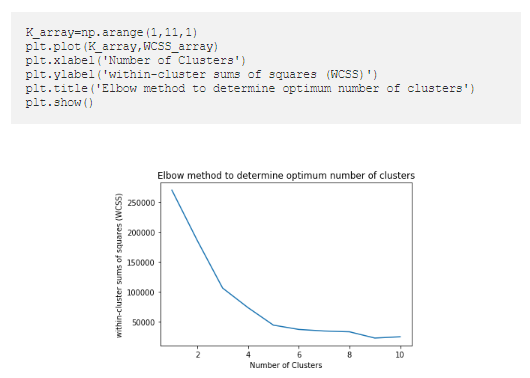

Maintenant, si nous observons le point après lequel il n'y a pas de changement soudain dans WCSS est K = 5. Nous choisissons donc K = 5 comme nombre approprié de grappes. Donc, pour tout ensemble de données donné, nous devons d'abord trouver le nombre approprié de clusters et commencer à faire des prédictions et des modifications aux conclusions.

Alors, avons-nous fini? Non, il nous reste un problème qui est l'initialisation aléatoire. C'est certainement un problème car si deux centroïdes initiaux sont très proches, il faudrait beaucoup d'itérations pour que l'algorithme converge et donc quelque chose doit être fait afin de s'assurer que les centroïdes initiaux sont éloignés l'un de l'autre. Ceci est décrit comme l'algorithme KMeans ++, où seule l'initialisation des centroïdes changera, le reste est similaire aux KMeans conventionnels.

L'objectif de l'initialisation de KMeans ++ est que les centroïdes choisis soient éloignés les uns des autres. Le premier centre de cluster est choisi de manière uniforme et aléatoire parmi les points de données qui sont regroupés, après quoi chaque centre de cluster suivant est choisi parmi les points de données restants avec une probabilité proportionnelle à sa distance au carré du centre de cluster existant le plus proche du point. Cela sera bien compris si nous le représentons comme des étapes.

Les étapes impliquées dans l'initialisation de Kmeans ++ sont:

1-Sélectionnez au hasard le premier centre de cluster à partir des points de données et ajoutez-le à la matrice centroïde.
2-Boucle sur le nombre de centroïdes à choisir (K):
3-Pour chaque point de données, calculez le carré de distance euclidienne à partir des centroïdes déjà choisis et ajoutez la distance minimale à un tableau de distance.
4-Calculez les probabilités de choisir le point de données particulier comme prochain centre de gravité en divisant les éléments du tableau Distance par la somme du tableau Distance. Appelons cette distribution de probabilité PD.
5-Calculez la distribution de probabilité cumulée à partir de cette distribution PD. Nous savions que la distribution de probabilité cumulative allait de 0 à 1.
6-Sélectionnez un nombre aléatoire entre 0 et 1, obtenez l'indice (i) de la distribution de probabilité cumulée qui est juste supérieur au nombre aléatoire choisi et attribuez le point de données correspondant à l'indice sélectionné (i).
7-Répétez le processus jusqu'à ce que nous ayons K nombre de centres de cluster.

Voici un exemple unidimensionnel. Nos observations sont [0, 1, 2, 3, 4]. Soit le premier centre, c1, égal à 0. La probabilité que le centre de grappe suivant, c2, soit x est proportionnelle à || c1-x || ^ 2. Donc, P (c2 = 1) = 1a, P (c2 = 2) = 4a, P (c2 = 3) = 9a, P (c2 = 4) = 16a, où a = 1 / (1 + 4 + 9 + 16).

Supposons que c2 = 4. Alors, P (c3 = 1) = 1a, P (c3 = 2) = 4a, P (c3 = 3) = 1a, où a = 1 / (1 + 4 + 1).

Exemples de sondes = [0,1,0,2,0,3,0,4], cumprobs = [0,1,0,3,0,6,1,0]. Choisissons un nombre aléatoire r entre 0 et 1. si choisi r <cumprobs [0], alors cet événement a une probabilité de 0,1, sinon s'il est choisi r <cumprobs [1], alors cet événement a une probabilité de 0,3 et donc le point de données correspondant à l'index 1 est choisi comme prochain centre de cluster.

Maintenant, implémentons cette initialisation et comparons les résultats avec une initialisation aléatoire.

1-Sélectionnez au hasard le premier centre de cluster à partir des points de données et ajoutez-le à la matrice centroïde.

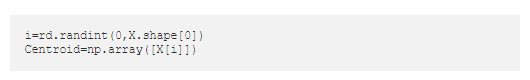

2. Mettons tout en boucle plus tard.
3. Pour chaque point de données, calculez le carré de distance euclidien à partir des centroïdes déjà choisis et ajoutez la distance minimale à un tableau de distance.

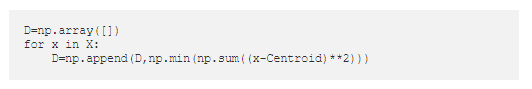

4. Calculez les probabilités de choisir le point de données particulier comme prochain centre de gravité en divisant les éléments du tableau Distance par la somme du tableau Distance. Appelons cette distribution de probabilité P.

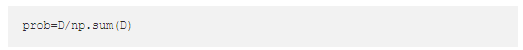

Nous ne pouvons pas simplement sélectionner le point de données avec la plus forte probabilité comme centre de cluster, car il pourrait y avoir une chance que le cluster sélectionné coïncide avec les centres de cluster précédents.

5. Calculez la distribution de probabilité cumulative à partir de cette distribution PD. Nous savions que la distribution de probabilité cumulative allait de 0 à 1.

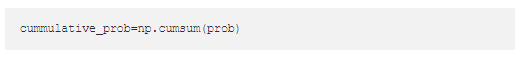

6. Sélectionnez un nombre aléatoire compris entre 0 et 1, obtenez l'indice (i) de la distribution de probabilité cumulative qui est juste supérieur au nombre aléatoire choisi et attribuez le point de données correspondant à l'indice sélectionné (i).

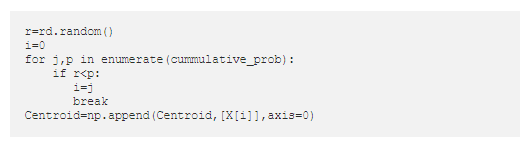

Assembler dans une boucle for pour les clusters K:

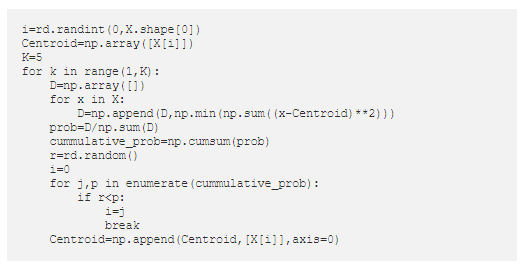

La dernière partie de l'article est de visualiser les résultats et de voir comment Kmeans ++ résout le problème de l'initialisation aléatoire.

Centroid_rand est le centre de cluster choisi au hasard et Centroid est celui obtenu à partir de Kmeans ++.

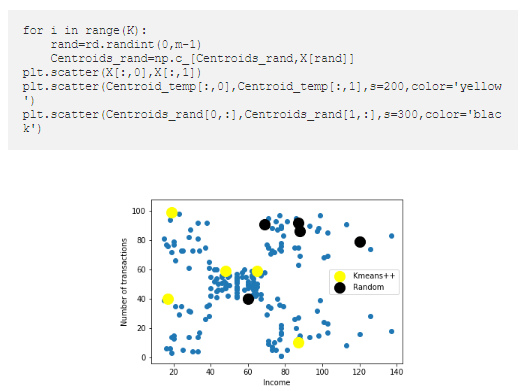

Les points jaunes sont les centres de cluster choisis en utilisant l'algorithme Kmeans ++ et les points noirs sont les centres de cluster choisis en utilisant l'initialisation aléatoire.

Il est clair que les points jaunes sont largement répartis sur l'intrigue et les points noirs sont beaucoup plus proches. Cela montrera certainement un impact dans l'amélioration de la complexité de calcul de l'algorithme de clustering Kmeans.

Enfin, implémentons toutes ces étapes à l'aide de la bibliothèque sklearn afin de pouvoir comparer les résultats:

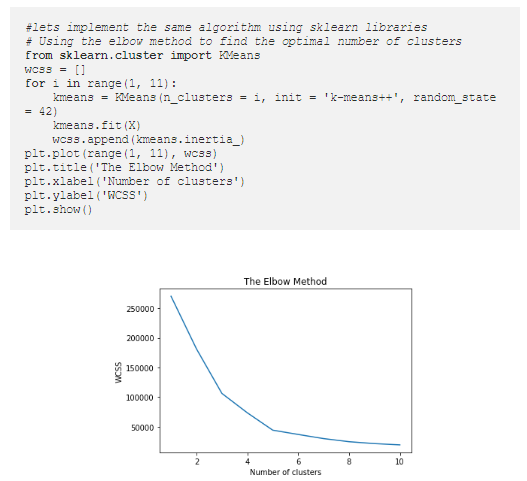

Nous pouvons observer que la courbe est beaucoup plus lisse que notre courbe implémentée.

L'initialisation du centroïde dans sklearn se produit en utilisant le paramètre k-means ++ comme indiqué.

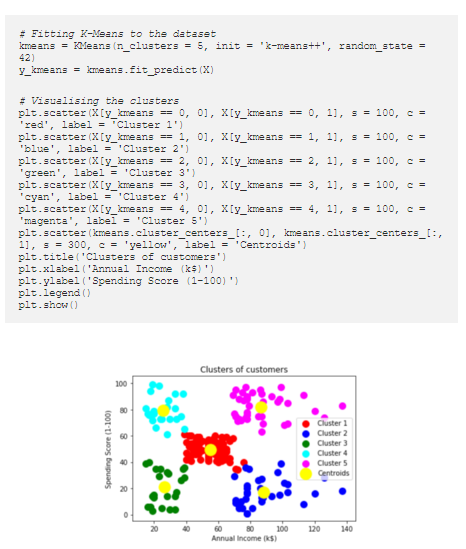


In [ ]:
########## Un exemple de K-Means sur des données IRIS
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import datasets
iris_dataset = datasets.load_iris()

print("shape of data: {}".format(iris_dataset['data'].shape))

x = scale(iris_dataset.data)
y = pd.DataFrame(iris_dataset.target)

shape of data: (150, 4)


Minimiser la distance entre les points à l'intérieur des K partitions

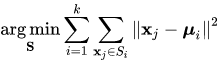

In [ ]:
from sklearn.cluster import KMeans
# n_clusters=3 signifie qu'on a 3 centres
clustering = KMeans(n_clusters = 3, random_state = 5)
y_kmeans = clustering.fit_predict(x)

In [ ]:
clustering.cluster_centers_
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Mettre à jour la moyenne de chaque cluster

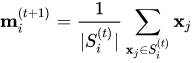

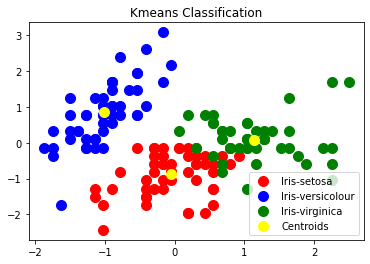

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Kmeans Classification')
plt.legend()